2 Dimensional Local Histogram Equalization

In [1]:
### Run below if necessary

##import sys

##sys.path.append('/usr/local/lib/python2.7/site-packages')

import math
import csv,gc
import matplotlib
import numpy as np
import cv2

#%matplotlib
BINS = 32

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from skimage import data, img_as_float
from skimage import exposure
import cv2

[[ 52  55  61  66  70  61  64  73]
 [ 63  59  55  90 109  85  69  72]
 [ 62  59  68 113 144 104  66  73]
 [ 63  58  71 122 154 106  70  69]
 [ 67  61  68 104 126  88  68  70]
 [ 79  65  60  70  77  68  58  75]
 [ 85  71  64  59  55  61  65  83]
 [ 87  79  69  68  65  76  78  94]]
 
[52 55 61 66 70 61 64 73]
[ 63  59  55  90 109  85  69  72]
 
[ 52  55  61  66  70  61  64  73  63  59  55  90 109  85  69  72  62  59
  68 113 144 104  66  73  63  58  71 122 154 106  70  69  67  61  68 104
 126  88  68  70  79  65  60  70  77  68  58  75  85  71  64  59  55  61
  65  83  87  79  69  68  65  76  78  94]
4869
 


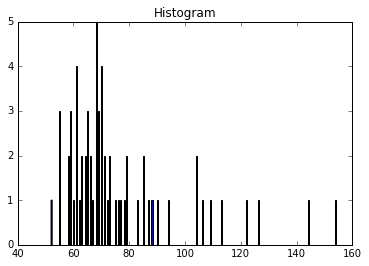

 
 
[255 128 128 128 128 255 128 128 128 128 255  64  64 128 128 128 255 255
  64  64  64 191 255  64 128 255  64  64  64 191 191 191 128 191 128 128
 128 255 255 128 128 191 255 128 191 255 255  64 128 191 191 255 255 191
 128  64 128 191 191 128 128  64  64  64]
9830
 


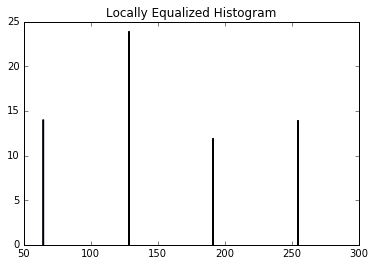

In [19]:
img = [
    [52, 55, 61,  66,  70,  61, 64, 73],
    [63, 59, 55,  90, 109,  85, 69, 72],
    [62, 59, 68, 113, 144, 104, 66, 73],
    [63, 58, 71, 122, 154, 106, 70, 69],
    [67, 61, 68, 104, 126,  88, 68, 70],
    [79, 65, 60,  70,  77,  68, 58, 75],
    [85, 71, 64,  59,  55,  61, 65, 83],
    [87, 79, 69,  68,  65,  76, 78, 94]
]

img = np.asarray(img)
print img

print " "

print img[0]
print img[1]

print " "

imgflat = img.reshape(-1)
print imgflat
print imgflat.sum()

print " "
fig = plt.hist(imgflat, bins=255)
plt.title('Histogram')
plt.show()

print " "

#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe = cv2.createCLAHE()

img_grey = np.array(img * 255, dtype = np.uint8)
#threshed = cv2.adaptiveThreshold(img_grey, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)

cl1 = clahe.apply(img_grey)
 
#cv2.imwrite('clahe_2.jpg',cl1)
#cv2.startWindowThread()
#cv2.namedWindow("adaptive")
#cv2.imshow("adaptive", cl1)
#cv2.imshow("adaptive", threshed)
#plt.imshow(threshed)

print " "

localimgflat = cl1.reshape(-1)
print localimgflat
print localimgflat.sum()

print " "
fig = plt.hist(localimgflat, bins=255)
plt.title('Locally Equalized Histogram')
plt.show()

[ 0.01067981  0.01129595  0.01252824  0.01355514  0.01437667  0.01252824
  0.01314438  0.01499281  0.012939    0.01211748  0.01129595  0.01848429
  0.02238653  0.01745738  0.01417129  0.01478743  0.01273362  0.01211748
  0.01396591  0.02320805  0.02957486  0.02135962  0.01355514  0.01499281
  0.012939    0.0119121   0.01458205  0.02505648  0.03162867  0.02177038
  0.01437667  0.01417129  0.01376053  0.01252824  0.01396591  0.02135962
  0.025878    0.01807353  0.01396591  0.01437667  0.0162251   0.01334976
  0.01232286  0.01437667  0.01581434  0.01396591  0.0119121   0.01540357
  0.01745738  0.01458205  0.01314438  0.01211748  0.01129595  0.01252824
  0.01334976  0.01704662  0.01786815  0.0162251   0.01417129  0.01396591
  0.01334976  0.01560895  0.01601972  0.01930581]


<function matplotlib.pyplot.show>

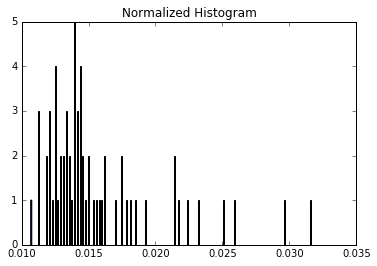

In [18]:
imgnorm = imgflat*1.0/sum(imgflat)
print imgnorm

plt.hist(imgnorm, bins = 255)
plt.title('Normalized Histogram')
plt.show